In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sbn

sbn.set()

MISSING:

- (1) Compare histograms with analytical results and peform tests on distribution type
- (3) Confidence interval for variance?
- (4) Simulate pareto using composition?



<h3>(1) Generate simulated values from distributions </h3>

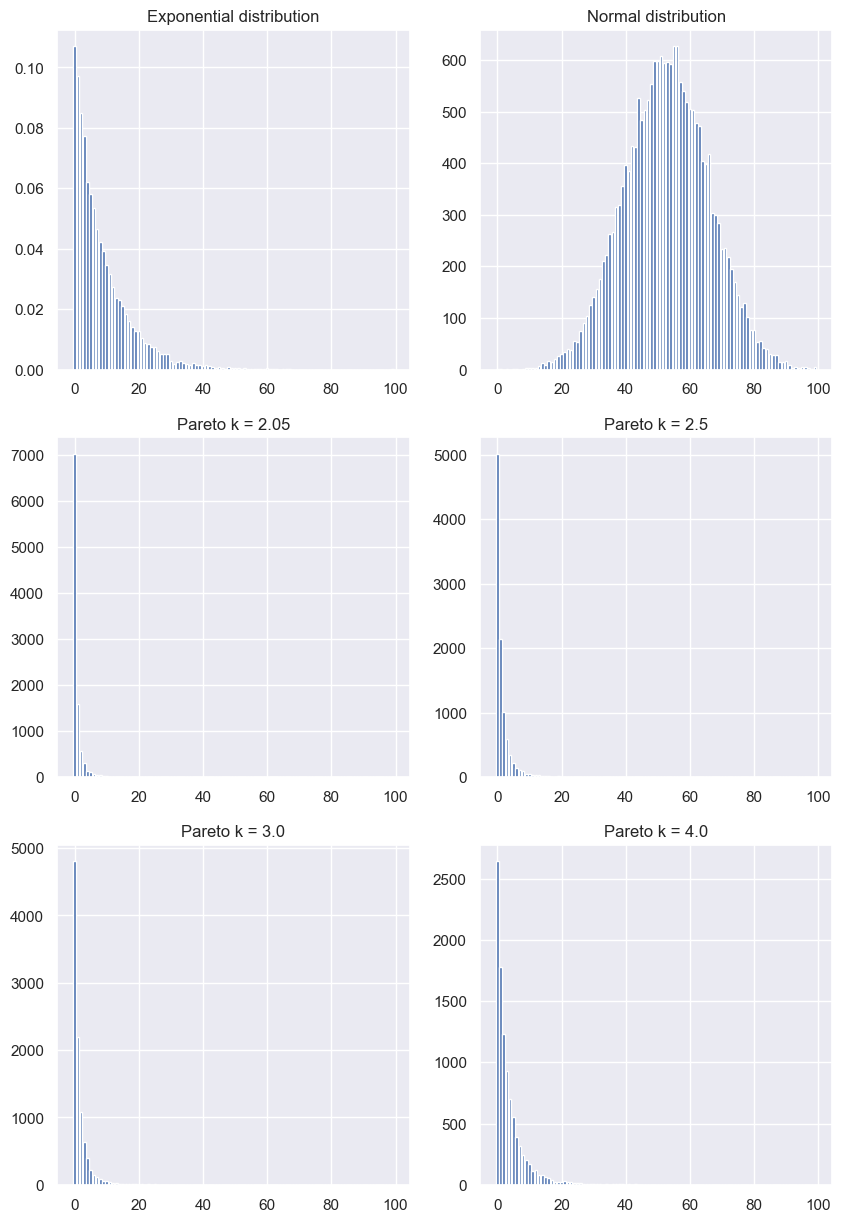

In [2]:
def exponential_distribution(lambda_, n = 10000):
    U = np.random.uniform(0, 1, size = n)
    X = -np.log(U) / lambda_
    return X

def standard_normal_distribution(n = 10000):
    # Using Box-Muller method
    U1 = np.random.uniform(0, 1, size = n)
    U2 = np.random.uniform(0, 1, size = n)

    Z = np.sqrt( -2 * np.log(U1)) * np.stack([np.cos(2 * np.pi * U2), np.sin(2 * np.pi * U2)], axis = 1).T

    return Z[0], Z[1]

def pareto_distribution(beta, k, n = 10000):
    U = np.random.uniform(0, 1, size = n)
    X = beta * U ** (-1/k)

    return X

n_bins = 100
n = 10000

X_exp = exponential_distribution(lambda_ = 10, n = n)
X_exp_hist = np.histogram(X_exp, bins = n_bins)[0] / n

X_norm = standard_normal_distribution(n = n)
X_norm_hist = np.histogram(X_norm, bins = n_bins)[0]

k1 = 2.05
k2 = 2.5
k3 = 3.
k4 = 4.

X_par_1 = pareto_distribution(beta = 1, k = k1, n = n)
X_par_1_hist = np.histogram(X_par_1, bins = n_bins)[0]

X_par_2 = pareto_distribution(beta = 1, k = k2, n = n)
X_par_2_hist = np.histogram(X_par_2, bins = n_bins)[0]

X_par_3 = pareto_distribution(beta = 1, k = k3, n = n)
X_par_3_hist = np.histogram(X_par_3, bins = n_bins)[0]

X_par_4 = pareto_distribution(beta = 1, k = k4, n = n)
X_par_4_hist = np.histogram(X_par_4, bins = n_bins)[0]

fig, ax = plt.subplots(3, 2, figsize = (10, 15))
ax[0, 0].set_title(f'Exponential distribution')
ax[0, 0].bar(np.arange(0, n_bins, 1), height = X_exp_hist)
ax[0, 1].set_title(f'Normal distribution')
ax[0, 1].bar(np.arange(0, n_bins, 1), height = X_norm_hist)
ax[1, 0].set_title(f'Pareto k = {k1}')
ax[1, 0].bar(np.arange(0, n_bins, 1), height = X_par_1_hist)
ax[1, 1].set_title(f'Pareto k = {k2}')
ax[1, 1].bar(np.arange(0, n_bins, 1), height = X_par_2_hist)
ax[2, 0].set_title(f'Pareto k = {k3}')
ax[2, 0].bar(np.arange(0, n_bins, 1), height = X_par_3_hist)
ax[2, 1].set_title(f'Pareto k = {k4}')
ax[2, 1].bar(np.arange(0, n_bins, 1), height = X_par_4_hist)

plt.show()


<h3>(2) Pareto distribution moments </h3>

In [4]:
X1 = pareto_distribution(beta = 1, k = k1, n = n)
X2 = pareto_distribution(beta = 1, k = k2, n = n)
X3 = pareto_distribution(beta = 1, k = k3, n = n)
X4 = pareto_distribution(beta = 1, k = k4, n = n)

ks = [k1, k2, k3, k4]

def pareto_moments_analytical(beta, k):
    Ex = beta * k / (k - 1)
    if k > 2:
        Varx = beta ** 2 * k / ((k - 1) ** 2 * (k - 2))
    else:
        Varx = None

    return Ex, Varx

beta = 1

pareto_simulations = {
    k1 : X1,
    k2 : X2, 
    k3 : X3,
    k4 : X4
}

for k in ks:
    E, Var = pareto_moments_analytical(beta, k)
    mean_x = np.mean(pareto_simulations.get(k))
    var_x = np.var(pareto_simulations.get(k))

    print(f' k = {k}, Simulation: ({mean_x:.4f}, {var_x:.4f}), Analytical: ({E:.4f}, {Var:.4f}) ')


 k = 2.05, Simulation: (1.9095, 3.3794), Analytical: (1.9524, 37.1882) 
 k = 2.5, Simulation: (1.6737, 1.8076), Analytical: (1.6667, 2.2222) 
 k = 3.0, Simulation: (1.4895, 0.6664), Analytical: (1.5000, 0.7500) 
 k = 4.0, Simulation: (1.3299, 0.1991), Analytical: (1.3333, 0.2222) 


The second moment (variance) is much harder to capture for the pareto distribution than the first moment. It get's better the larger k-value we use.

<h3> (3) Normal distribution confidence intervals </h3>

In [7]:
def confidence_interval(vals, alpha = 0.05):
    if type(vals) != np.ndarray:
        vals = np.array(vals)

    n = len(vals)

    mean_ = np.mean(vals)
    std_error = np.sqrt( 1 / (n - 1) * np.sum((vals - mean_) ** 2))

    t = stats.t.ppf(1 - (alpha / 2), df = n - 1 )

    conf = [mean_ - t * std_error / np.sqrt(n), mean_ + t * std_error / np.sqrt(n)]

    return np.array(conf)

rounds = 100
conf_ints = np.zeros((100, 2))

for r in range(rounds):
    vals = standard_normal_distribution(n = 10)
    conf_ints[r] = confidence_interval(vals, alpha = 0.05)


conf_ints

array([[-34.72725426,  34.60606409],
       [-32.94566623,  32.82666468],
       [-37.07919142,  37.5796571 ],
       [-34.34931682,  34.99892696],
       [-41.40171648,  41.53988571],
       [-29.42250901,  29.04981407],
       [-28.17810855,  28.15997508],
       [-51.91918203,  52.31146578],
       [-41.49235471,  41.19109496],
       [-40.8466801 ,  40.45793059],
       [-35.61996193,  35.33622211],
       [-34.91734653,  35.02737005],
       [-39.40657439,  39.64108505],
       [-39.70831431,  39.52344094],
       [-47.39706317,  47.57009276],
       [-28.66480169,  28.54512509],
       [-44.79171271,  44.85795047],
       [-32.688261  ,  32.91222659],
       [-43.13395635,  42.87148248],
       [-48.22422125,  48.37672454],
       [-44.6866976 ,  44.92897716],
       [-33.8521117 ,  33.62674433],
       [-45.28014816,  45.16008002],
       [-49.93794614,  50.96387257],
       [-28.43833713,  28.05464932],
       [-40.21846271,  40.04662204],
       [-37.08049665,  36.88863027],
 

<h3>(4) Pareto distribution using composition methods </h3>

In [ ]:
# Generate Y from f(y)

# Generate X from f(x|y) where Y is used

X = np.random.uniform(0, 1, size = 10000)

def f(mu = x):


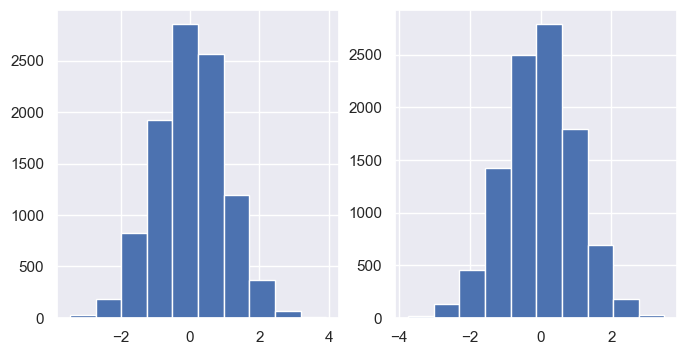

In [21]:
def standard_normal_distribution(n = 10000):
    # Using Box-Muller method
    U1 = np.random.uniform(0, 1, size = n)
    U2 = np.random.uniform(0, 1, size = n)

    #theta = 2 * np.pi * U2
    #r = np.sqrt( -2 * np.log(U1))

    Z = np.sqrt( -2 * np.log(U1)) * np.stack([np.cos(2 * np.pi * U2), np.sin(2 * np.pi * U2)], axis = 1).T

    return Z[0], Z[1]

Z1, Z2 = standard_normal_distribution(10000)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].hist(Z1)
ax[1].hist(Z2)

plt.show()


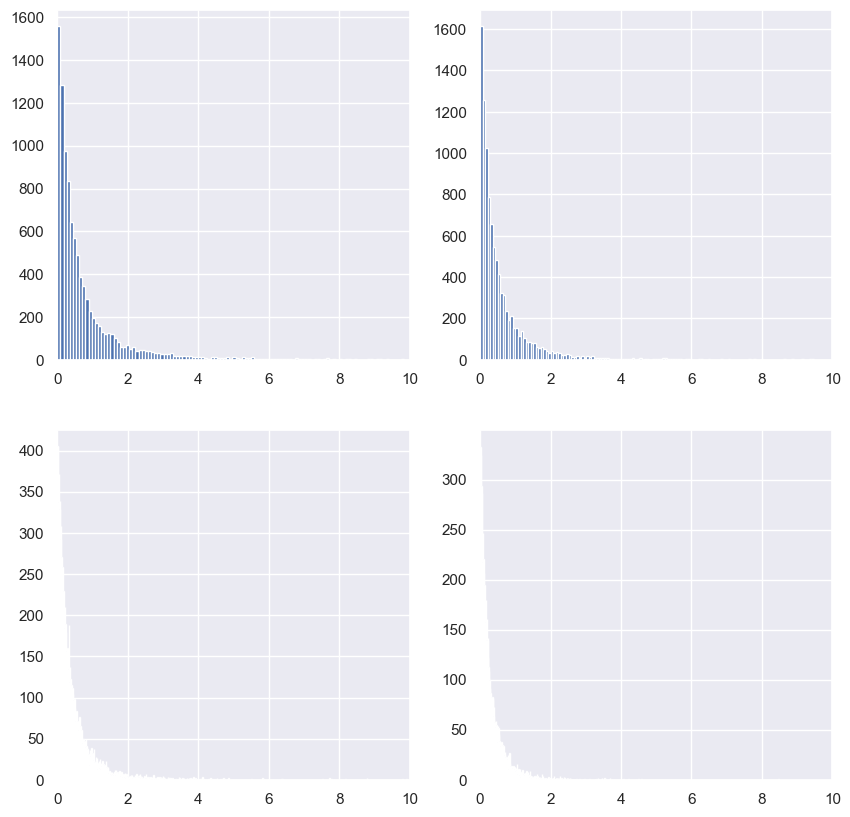

In [81]:
def pareto_distribution(beta = 1, k = 2.05, n = 10000):
    U = np.random.uniform(0, 1, size = n)

    X = beta * (U ** (-1/k) - 1)

    return X

X1 = pareto_distribution(k = 2.05)
X2 = pareto_distribution(k = 2.5)
X3 = pareto_distribution(k = 3)
X4 = pareto_distribution(k = 4)

Xs = [X1, X2, X3, X4]
n_bins = 100

x_range = np.linspace(0, 1, 10)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
axf = ax.flatten()
for i in range(len(axf)):
    axf[i].set_xlim(0, 10)
    axf[i].hist(Xs[i], bins = 1000, color='b')

plt.show()